![alt text](https://drive.google.com/uc?id=1M4oqDSD4f7WltMEHU0aFO6bIZ2fTmPwR)

> 
## Group No.13 RBA
### Aniket Joshi, Roll no. 06
### Varad Kate, Roll no. 07
### Namrata Patil, Roll no. 11
### Gauri Tirodkar, Roll no. 58


---




#  Covid-19 X-Ray image Classification using CNN
##### The dataset consists of two folders, training and validation. Each folder contains 2 subforders labeled as NORMAL and PNEUMONIA, each folder contains X-ray images as per their folder . Images are 400x300 px or larger and JPEG format (188 images). Images were downloaded from Kaggle, link for the dataset- [link text](https://www.kaggle.com/khoongweihao/covid19-xray-dataset-train-test-sets)

##### This project is intended as a test case for fine-grain classification tasks.

![alt text](https://drive.google.com/uc?id=15F-0Uapb7wkdiNQNylOyHn0cvbDQ82Jr)

> 
This is a sample X-ray image of Pneumonia infected lungs. We will be using such images to train our model.



---



Mounting Google Drive and importing libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install -q keras

In [3]:
import keras

Using TensorFlow backend.


In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Building the CNN architecture

In [5]:
# Initialising the CNN
classifier = Sequential()

In [6]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding third convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [7]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


![alt text](https://drive.google.com/uc?id=1g80DIuoNF13Jd3PKQl6bgzbhHNew5BtR)

> After compiling our model will resemble like this



In [8]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

Data Preparation

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 148 images belonging to 2 classes.


In [11]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 40 images belonging to 2 classes.


Training the model

In [12]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 20)




Epoch 1/10





100/100 [==============================] - 175s 2s/step - loss: 0.3365 - acc: 0.8492 - val_loss: 0.1104 - val_acc: 0.9500
Epoch 2/10
100/100 [==============================] - 123s 1s/step - loss: 0.1656 - acc: 0.9399 - val_loss: 0.0986 - val_acc: 0.9500
Epoch 3/10
100/100 [==============================] - 123s 1s/step - loss: 0.1268 - acc: 0.9565 - val_loss: 0.1037 - val_acc: 0.9750
Epoch 4/10
100/100 [==============================] - 123s 1s/step - loss: 0.0606 - acc: 0.9800 - val_loss: 0.1167 - val_acc: 0.9750
Epoch 5/10
100/100 [==============================] - 124s 1s/step - loss: 0.0469 - acc: 0.9805 - val_loss: 0.0396 - val_acc: 0.9750
Epoch 6/10
100/100 [==============================] - 124s 1s/step - loss: 0.0337 - acc: 0.9889 - val_loss: 0.0935 - val_acc: 0.9750
Epoch 7/10
100/100 [==============================] - 123s 1s/step - loss: 0.0156 - acc: 0.9953 - val_loss: 0.0719 - val_acc: 0.9750
Epoch 8/10
100/100 [==============================] - 120s 1s

Model Evaluation

In [0]:
sns.set_style('dark')

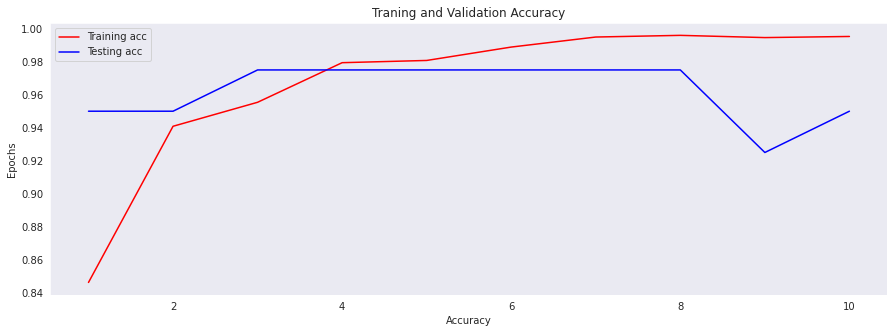

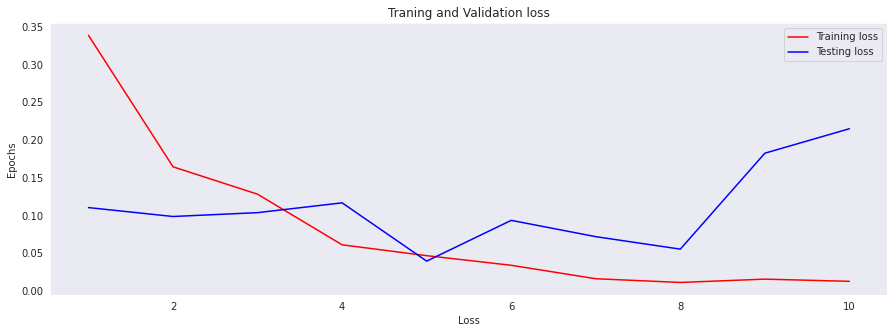

In [14]:


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize= (15,5))
plt.title('Traning and Validation Accuracy')
plt.plot(epochs, acc, 'red',label='Training acc')
plt.plot(epochs, val_acc, 'blue',label='Testing acc')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()
plt.show()
print('\n')
print('\n')
plt.figure(figsize= (15,5))
plt.title('Traning and Validation loss')
plt.plot(epochs, loss, 'red',label='Training loss')
plt.plot(epochs, val_loss, 'blue',label='Testing loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

Testing the model

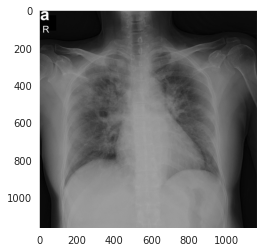

In [17]:
# Loading the image, initialy we will test the model on a Pneumonia xray
my_image = plt.imread("1-s2.0-S0929664620300449-gr2_lrg-a.jpg")
img = plt.imshow(my_image)

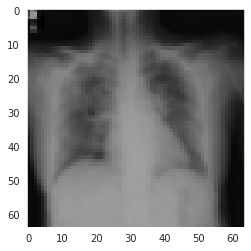

In [19]:
# Resizing the image
from skimage.transform import resize
my_image_resized = resize(my_image, (64,64,3)) 
img = plt.imshow(my_image_resized) 

In [20]:
# Finding probabilities of both class
probabilities = classifier.predict(np.array( [my_image_resized,] ))

probabilities

array([[0.99820673]], dtype=float32)

In [0]:
# Assigning categories to class
number_to_class = ['PNEUMONIA']

In [0]:
# Sorting the probabilities
index = np.argsort(probabilities[0,:])

In [27]:
#print("Most likely class:", number_to_class[index[1]], "-- Probability:", probabilities[0,index[1]])
print("Most likely class:", number_to_class[index[0]], "-- Probability:", probabilities[0,index[0]])

Most likely class: PNEUMONIA -- Probability: 0.99820673




---

